## Import Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor, DecisionTreeRegressor
from xgboost import XGBRegressor

#Classification
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import normalize,scale

cok fazla verimiz oldugundan train_test_split kullanilabilir

In [3]:
def regression_(x,y):
    lr=LinearRegression()
    r=Ridge()
    l=Lasso()
    e=ElasticNet()
    kn=KNeighborsRegressor()
    et=ExtraTreeRegressor()
    gb=GradientBoostingRegressor()
    dt=DecisionTreeRegressor()
    xgbr=XGBRegressor()
       
    algos=[lr,r,l,e,kn,et,gb,dt,xgbr]
    algos_names=['LinearRegressor','Ridge','Lasso','ElasticNet','KNeighbors','ExtraTree','GradientBoosting','DecisionTree','XGBRegressor']
    
    #x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=13)
    
    r_score=[]
    mse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_square','MSE','MAE'],index=algos_names)
    
    for algo in algos:
        pred=algo.fit(x,y).predict(x)
        r_score.append(r2_score(y,pred))
        mse.append(mean_squared_error(y,pred)**.5)
        mae.append(mean_absolute_error(y,pred))
    
    result.R_square=r_score
    result.MSE=mse
    result.MAE=mae
    
    return result.sort_values('R_square',ascending=False)

In [4]:
def classification_(X,y): 
    xgbc=XGBClassifier()
    g=GaussianNB()
    b=BernoulliNB()
    k=KNeighborsClassifier()
    svc=SVC()
    d=DecisionTreeClassifier()
    log=LogisticRegression()
    gbc=GradientBoostingClassifier()
    mn=MultinomialNB()
    rf=RandomForestClassifier()
    ab=AdaBoostClassifier()
    
    algos=[xgbc,g,b,k,svc,d,log,gbc,mn,rf,ab]
    algos_name=['XGBClassifier','Gaussian','Bernoulli','KNeighbors','SVC','DecisionTree','LogisticReg','GradientBoosting','MultinominalNB','RandomForest','AdaBoost']

    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=101)

    accuracy = []
    precision = []
    recall = []
    f1 = []
   
    result=pd.DataFrame(columns=['AccuracyScore','PrecisionScore','RecallScore','f1_Score'],index=algos_name)
    
    for i in algos:
        predict=i.fit(X_train,y_train).predict(X_test)
        accuracy.append(accuracy_score(y_test,predict))
        precision.append(precision_score(y_test,predict))
        recall.append(recall_score(y_test,predict))
        f1.append(f1_score(y_test,predict))
      
    result.AccuracyScore=accuracy
    result.PrecisionScore=precision
    result.RecallScore=recall
    result.f1_Score=f1
    
    return result.sort_values('AccuracyScore',ascending=False)

In [5]:
df = pd.read_csv('/content/drive/Othercomputers/My Laptop/0 Yaz Kampı/PBL1/3 - Loan Prediction/LoansTrainingSet.csv', low_memory=False)

## EDA and Missing Values

**Data Dictionary**

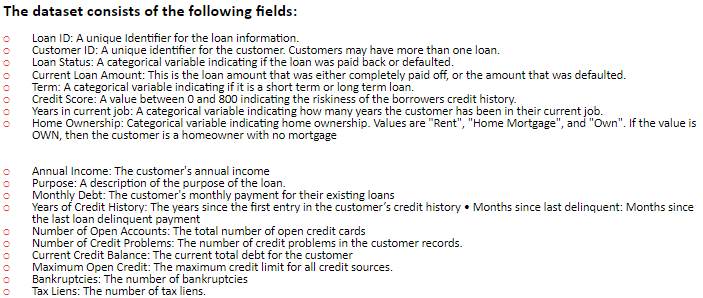

In [6]:
df.sort_values(by='Customer ID').tail(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
256215,ff3bf8c8-eda5-47fa-81fc-e7d36f0ca6fd,fffef78a-60b3-4778-b8bb-d2467595ed53,Charged Off,24530,Short Term,7280.0,10+ years,Rent,84074.0,Debt Consolidation,"$1,674.47",20.9,NaN,19,0,33160,48337,0.0,0.0
247372,f6626b9b-6311-4512-8eb6-f3e846e9b3cc,ffff610c-85ba-49fd-9005-8ce90785ff25,Charged Off,10222,Short Term,740.0,1 year,Own Home,51110.0,Debt Consolidation,"$1,175.53",11.9,NaN,23,0,21128,52039,0.0,0.0
247371,f6626b9b-6311-4512-8eb6-f3e846e9b3cc,ffff610c-85ba-49fd-9005-8ce90785ff25,Charged Off,10222,Short Term,740.0,1 year,Own Home,51110.0,Debt Consolidation,"$1,175.53",11.9,NaN,23,0,21128,52039,0.0,0.0
168035,a71d4b6e-3da7-45ae-9db6-d8aece68e4ae,ffff6cf8-4779-48be-9fc1-5a93b6e16c2d,Fully Paid,19996,Short Term,690.0,9 years,Rent,107978.0,Debt Consolidation,"$1,574.69",11.3,35.0,8,1,13626,21802,0.0,0.0
62242,3df6ff34-a3b4-49f4-a72a-e23fc77f4072,ffffc64c-8637-4a08-b2e7-5b67bd8da124,Fully Paid,26904,Long Term,NaN,10+ years,Rent,NaN,Debt Consolidation,"$1,701.90",14.4,45.0,21,1,12507,27794,0.0,1.0


247372 ve 247371 indexlerine sahip olan satirlar ayni. Bu yuzden loan id si ve customer id si ayni olan cift satirlardan bir tane kalacak sekilde silicez.

In [7]:
df.drop_duplicates(subset=['Loan ID', 'Customer ID'], keep='last', inplace=True) # 2 li ciftlerden sonra gelen kalsin demek icin keep='last kullanilir

In [8]:
df.nunique() # bazi satirlarin hem loan id leri hem de customer id leri ayni duzenleme gerekli

Loan ID                         215700
Customer ID                     215700
Loan Status                          2
Current Loan Amount              27306
Term                                 2
Credit Score                       314
Years in current job                11
Home Ownership                       4
Annual Income                    59781
Purpose                             10
Monthly Debt                    128776
Years of Credit History            541
Months since last delinquent       131
Number of Open Accounts             59
Number of Credit Problems           12
Current Credit Balance           45630
Maximum Open Credit              68894
Bankruptcies                         8
Tax Liens                           12
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215700 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       215700 non-null  object 
 1   Customer ID                   215700 non-null  object 
 2   Loan Status                   215700 non-null  object 
 3   Current Loan Amount           215700 non-null  int64  
 4   Term                          215700 non-null  object 
 5   Credit Score                  167406 non-null  float64
 6   Years in current job          206710 non-null  object 
 7   Home Ownership                215700 non-null  object 
 8   Annual Income                 167406 non-null  float64
 9   Purpose                       215700 non-null  object 
 10  Monthly Debt                  215700 non-null  object 
 11  Years of Credit History       215700 non-null  float64
 12  Months since last delinquent  97438 non-null

In [10]:
df.isnull().mean(axis=0) # sutunlardaki nan eleman yuzdesi

Loan ID                         0.000000
Customer ID                     0.000000
Loan Status                     0.000000
Current Loan Amount             0.000000
Term                            0.000000
Credit Score                    0.223894
Years in current job            0.041678
Home Ownership                  0.000000
Annual Income                   0.223894
Purpose                         0.000000
Monthly Debt                    0.000000
Years of Credit History         0.000000
Months since last delinquent    0.548271
Number of Open Accounts         0.000000
Number of Credit Problems       0.000000
Current Credit Balance          0.000000
Maximum Open Credit             0.000000
Bankruptcies                    0.002096
Tax Liens                       0.000102
dtype: float64

In [11]:
df.drop('Months since last delinquent', axis=1, inplace=True) # Months since last delinquent cogu bos silinir

In [12]:
# Bu sutunlardaki nanlar cok az bu yuzden nan a sahip olan satirlar silinir
df.drop(df[ (df['Bankruptcies'].isnull()==True) | (df['Tax Liens'].isnull()==True) | (df['Years in current job'].isnull()==True) ].index ,inplace=True) 

In [13]:
df.sample(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
28109,1c1b0763-ca84-48d8-8c71-9e219b284098,99713540-5b38-4b30-861b-d0107848be00,Fully Paid,1999,Short Term,NaN,10+ years,Home Mortgage,NaN,Home Improvements,$572.77,15.5,7,0,14819,17292,0.0,0.0
26941,1aedd56d-d01c-488d-aa50-7eb869c6b366,96956981-a8dc-491a-ad03-42b5fabe64a0,Fully Paid,8857,Short Term,745.0,10+ years,Own Home,73808.0,Debt Consolidation,"$1,057.91",18.7,12,1,7238,32027,1.0,0.0
207052,ce15ec31-1965-4cf1-bf4f-29a51db19744,7e212a98-b74f-445b-be82-317fd21a5846,Fully Paid,99999999,Short Term,710.0,5 years,Home Mortgage,15102.0,Debt Consolidation,$432.92,11.1,12,0,10780,35577,0.0,0.0
84844,544e3bf0-9396-40d8-879f-ba5e01b4dbf9,8b468d55-6b62-4344-8175-21b6c358f3c8,Fully Paid,22275,Short Term,742.0,2 years,Rent,162000.0,Debt Consolidation,"$1,809.00",13.8,16,1,21603,29674,0.0,0.0
227387,e2326d9e-c8fe-4588-b788-adebe623d9d2,567dc811-cff1-447f-a7d0-5fa6eb8510bf,Charged Off,17659,Long Term,721.0,4 years,Home Mortgage,37337.0,Debt Consolidation,$432.48,14.0,10,1,10342,19775,1.0,0.0


In [14]:
df.nunique(), df.info() # Hem buradaki Data Dictionary'e hem yukardaki df'e hem asagidaki output'a bakilarak cikarimlar yapilmistir
# Strateji: her sutunun infosunu oku, data tipine ve nunique e bak, yukarda data tipini dogrula, eger object ise value_counts ile anomali tespit et

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206258 entries, 0 to 256983
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan ID                    206258 non-null  object 
 1   Customer ID                206258 non-null  object 
 2   Loan Status                206258 non-null  object 
 3   Current Loan Amount        206258 non-null  int64  
 4   Term                       206258 non-null  object 
 5   Credit Score               159938 non-null  float64
 6   Years in current job       206258 non-null  object 
 7   Home Ownership             206258 non-null  object 
 8   Annual Income              159938 non-null  float64
 9   Purpose                    206258 non-null  object 
 10  Monthly Debt               206258 non-null  object 
 11  Years of Credit History    206258 non-null  float64
 12  Number of Open Accounts    206258 non-null  int64  
 13  Number of Credit Problems  20

(Loan ID                      206258
 Customer ID                  206258
 Loan Status                       2
 Current Loan Amount           27046
 Term                              2
 Credit Score                    313
 Years in current job             11
 Home Ownership                    4
 Annual Income                 57683
 Purpose                          10
 Monthly Debt                 125626
 Years of Credit History         525
 Number of Open Accounts          59
 Number of Credit Problems        12
 Current Credit Balance        45173
 Maximum Open Credit           67831
 Bankruptcies                      8
 Tax Liens                        12
 dtype: int64, None)

* Monthly Debt object ten float a cevrilmeli
* Maximum Open Credit object ten float a cevrilmeli
* Loan ID ve Customer ID silinmeli artik ihtiyacimiz yok
* Purpose da kucuk harfli other i duzelt



In [15]:
df['Monthly Debt']=df['Monthly Debt'].str.replace('$','').str.replace(',','').astype(float) # $ i kaldırıp sütunu float a çevirdik

In [16]:
# df['Maximum Open Credit'] de #VALUE! degerlerine sahip olan satirlari sil
df.drop(df[df['Maximum Open Credit']=='#VALUE!'].index, inplace=True)

In [17]:
df['Maximum Open Credit'] = df['Maximum Open Credit'].astype(float) # float a cevirdik

In [18]:
df.drop(columns=['Loan ID', 'Customer ID'], inplace=True) # gereksiz sutunlar silindi

In [19]:
df['Purpose'].value_counts() # other lar birlestirilmeli

Debt Consolidation      164012
Home Improvements        12133
other                    11025
Other                     7904
Business Loan             3491
Buy a Car                 2793
Medical Bills             2215
Buy House                 1249
Take a Trip               1224
Educational Expenses       210
Name: Purpose, dtype: int64

In [20]:
df['Purpose'] = df['Purpose'].apply(lambda x: x.capitalize())
df['Purpose'].value_counts()

Debt consolidation      164012
Other                    18929
Home improvements        12133
Business loan             3491
Buy a car                 2793
Medical bills             2215
Buy house                 1249
Take a trip               1224
Educational expenses       210
Name: Purpose, dtype: int64

## Feature Engineering

**Credit Utilization Rate**

Your credit utilization is the ratio of your total credit to your total debt and is usually expressed as a percentage. If your credit utilization ratio is 20 percent, it means you’re using 20 percent of the credit available to you.

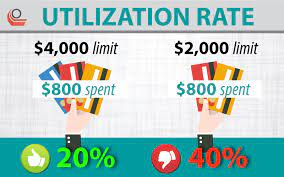


In [21]:
# CUR = su anki borc/(en bastan beri olan limit) = totplam harcanan/(toplam harcanan + kalan limit)
df['Credit Utilization Rate'] = df['Current Credit Balance']/(df['Current Credit Balance'] + df['Maximum Open Credit'])

In [22]:
df[df['Maximum Open Credit']==0].sample(3)

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Utilization Rate
31808,Fully Paid,99999999,Short Term,750.0,2 years,Home Mortgage,89762.0,Other,682.94,25.3,7,0,146974,0.0,0.0,0.0,1.0
251357,Charged Off,20944,Long Term,690.0,5 years,Rent,65449.0,Debt consolidation,1908.91,9.5,10,0,10,0.0,0.0,0.0,1.0
144025,Fully Paid,7954,Short Term,747.0,10+ years,Home Mortgage,31328.0,Home improvements,189.02,19.9,7,0,0,0.0,0.0,0.0,NaN


In [23]:
df.isnull().mean(axis=0) # Credit Utilization Rate cok az nan var silinir
# nan olusma sebebi bazi satirlarin Maximum Open Credit'i veya Current Credit Balance'i 0 , sayi/0=inf,  0/0=nan

Loan Status                  0.000000
Current Loan Amount          0.000000
Term                         0.000000
Credit Score                 0.224575
Years in current job         0.000000
Home Ownership               0.000000
Annual Income                0.224575
Purpose                      0.000000
Monthly Debt                 0.000000
Years of Credit History      0.000000
Number of Open Accounts      0.000000
Number of Credit Problems    0.000000
Current Credit Balance       0.000000
Maximum Open Credit          0.000000
Bankruptcies                 0.000000
Tax Liens                    0.000000
Credit Utilization Rate      0.006182
dtype: float64

In [24]:
df.drop(df[df['Credit Utilization Rate'].isnull()==True].index, inplace=True) # ancak suanda ise inf degerler var

In [25]:
# inf degerler max limit 0 oldugundan kaynakli
# ancak birinin max limiti 0 olmussa demek ki elindeki tum kaynaklari kullanmis bu yuzden credit utilization rate'i 1 e esit olmalidir
df.replace([np.inf], 1.0, inplace=True) 

In [26]:
# Bazi Current Loan Amount degerleri 99999999 onlari nan yapip predict edicez
df['Current Loan Amount'].replace([99999999],np.nan,inplace=True)

In [27]:
# Bazi Credit Score degerlerinde fazladan sifir var onlari 10'a bolucez
df['Credit Score'] = df['Credit Score'].apply(lambda x: x/10 if x>800 else x)

In [28]:
abs(df.corr()['Credit Score']).sort_values(ascending=False)

Credit Score                 1.000000
Current Loan Amount          0.226210
Credit Utilization Rate      0.222779
Monthly Debt                 0.087650
Years of Credit History      0.081239
Number of Credit Problems    0.061927
Bankruptcies                 0.049030
Number of Open Accounts      0.042103
Tax Liens                    0.025597
Current Credit Balance       0.016530
Annual Income                0.014931
Maximum Open Credit          0.009553
Name: Credit Score, dtype: float64

In [29]:
# korelasyon degerleri cok kucuk oldugundan median ile doldurulur
df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].median())

In [30]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Utilization Rate
count,171436.000000,204981.000000,1.589540e+05,204981.000000,204981.000000,204981.000000,204981.000000,2.049810e+05,2.049810e+05,204981.000000,204981.000000,204981.000000
mean,13965.132563,725.034662,7.407249e+04,975.049808,18.151727,11.161586,0.150951,1.567262e+04,3.727131e+04,0.106683,0.025832,0.337343
std,8226.824093,23.781920,5.827239e+04,637.440273,6.830456,4.974065,0.451747,1.986417e+04,6.136426e+05,0.331245,0.237829,0.114703
min,975.000000,585.000000,4.033000e+03,0.000000,3.400000,1.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000300
25%,7835.000000,720.000000,4.557600e+04,541.720000,13.500000,8.000000,0.000000,6.099000e+03,1.321000e+04,0.000000,0.000000,0.270079
50%,12055.000000,732.000000,6.363500e+04,854.580000,16.900000,10.000000,0.000000,1.122400e+04,2.232900e+04,0.000000,0.000000,0.359014
75%,19391.000000,740.000000,8.900075e+04,1265.110000,21.600000,14.000000,0.000000,1.954000e+04,3.709400e+04,0.000000,0.000000,0.425271
max,41000.000000,751.000000,8.713547e+06,22939.120000,66.000000,76.000000,11.000000,1.731412e+06,1.763322e+08,7.000000,11.000000,1.000000


## Data Visualization

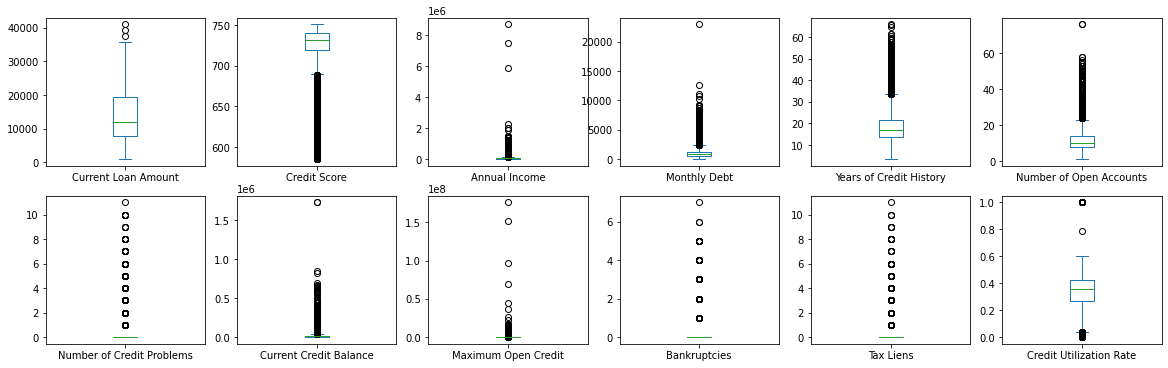

In [31]:
df.plot(kind="box", subplots=True, layout=(2,6), figsize=(20,6));

## Using Regression for Missing Values

In [32]:
df.isnull().mean(axis=0)

Loan Status                  0.000000
Current Loan Amount          0.163649
Term                         0.000000
Credit Score                 0.000000
Years in current job         0.000000
Home Ownership               0.000000
Annual Income                0.224543
Purpose                      0.000000
Monthly Debt                 0.000000
Years of Credit History      0.000000
Number of Open Accounts      0.000000
Number of Credit Problems    0.000000
Current Credit Balance       0.000000
Maximum Open Credit          0.000000
Bankruptcies                 0.000000
Tax Liens                    0.000000
Credit Utilization Rate      0.000000
dtype: float64

### Regression for Current Loan Amount

In [33]:
abs(df.corr()['Current Loan Amount']).sort_values(ascending=False)

Current Loan Amount          1.000000
Monthly Debt                 0.424215
Annual Income                0.343024
Current Credit Balance       0.323157
Credit Score                 0.192333
Number of Open Accounts      0.191937
Years of Credit History      0.167700
Credit Utilization Rate      0.102181
Bankruptcies                 0.094588
Number of Credit Problems    0.074209
Maximum Open Credit          0.041698
Tax Liens                    0.010016
Name: Current Loan Amount, dtype: float64

In [34]:
# dummy variable kullanabilmek icin drop kullanmak zorundayiz # 0.2 den kucuk olan sutunlari attik
df1 = df.drop(columns=['Credit Score','Number of Open Accounts', 'Years of Credit History', 'Credit Utilization Rate', 'Bankruptcies', 'Number of Credit Problems', 'Maximum Open Credit', 'Tax Liens'])
df1_dummies = pd.get_dummies(df1, drop_first=True) #df1 e get dummies uyguladik
dolu = df1_dummies[df1_dummies['Current Loan Amount'].notnull()]
bos = df1_dummies[df1_dummies['Current Loan Amount'].isnull()]

In [35]:
dolu.drop( dolu[dolu['Annual Income'].isnull()].index, inplace=True) # Annual income ve credit score u nan olan satirlari attik

In [36]:
dolu.shape, bos.shape

((125409, 27), (33545, 27))

In [37]:
gb=GradientBoostingRegressor()
pred=gb.fit(dolu.drop(columns=['Current Loan Amount']), dolu['Current Loan Amount']).predict(bos.drop(columns=['Current Loan Amount']))

In [38]:
df.loc[df[df['Current Loan Amount'].isnull()].index, 'Current Loan Amount'] = pred # bos yerleri pred ile doldur

In [39]:
df.isnull().mean(axis=0)

Loan Status                  0.000000
Current Loan Amount          0.000000
Term                         0.000000
Credit Score                 0.000000
Years in current job         0.000000
Home Ownership               0.000000
Annual Income                0.224543
Purpose                      0.000000
Monthly Debt                 0.000000
Years of Credit History      0.000000
Number of Open Accounts      0.000000
Number of Credit Problems    0.000000
Current Credit Balance       0.000000
Maximum Open Credit          0.000000
Bankruptcies                 0.000000
Tax Liens                    0.000000
Credit Utilization Rate      0.000000
dtype: float64

### Regression for Annual Income

In [40]:
abs(df.corr()['Annual Income']).sort_values(ascending=False)

Annual Income                1.000000
Monthly Debt                 0.463668
Current Loan Amount          0.360863
Current Credit Balance       0.306858
Years of Credit History      0.173516
Number of Open Accounts      0.138387
Bankruptcies                 0.041341
Tax Liens                    0.037284
Maximum Open Credit          0.030341
Credit Utilization Rate      0.027978
Credit Score                 0.014931
Number of Credit Problems    0.011670
Name: Annual Income, dtype: float64

In [41]:
df.select_dtypes(include=object).columns.values

array(['Loan Status', 'Term', 'Years in current job', 'Home Ownership',
       'Purpose'], dtype=object)

In [42]:
df3 = df[['Annual Income', 'Monthly Debt', 'Current Loan Amount', 'Current Credit Balance', 'Loan Status', 'Term', 'Years in current job', 'Home Ownership',
       'Purpose']]

In [43]:
df3_dummies = pd.get_dummies(df, drop_first=True)
dolu = df3_dummies[df3_dummies['Annual Income'].notnull()]
bos = df3_dummies[df3_dummies['Annual Income'].isnull()]

In [44]:
gb=GradientBoostingRegressor()
pred=gb.fit(dolu.drop(columns=['Annual Income']), dolu['Annual Income']).predict(bos.drop(columns=['Annual Income']))

In [45]:
df.loc[df[df['Annual Income'].isnull()].index, 'Annual Income'] = pred # bos yerleri pred ile doldur

In [46]:
df.isnull().mean(axis=0)

Loan Status                  0.0
Current Loan Amount          0.0
Term                         0.0
Credit Score                 0.0
Years in current job         0.0
Home Ownership               0.0
Annual Income                0.0
Purpose                      0.0
Monthly Debt                 0.0
Years of Credit History      0.0
Number of Open Accounts      0.0
Number of Credit Problems    0.0
Current Credit Balance       0.0
Maximum Open Credit          0.0
Bankruptcies                 0.0
Tax Liens                    0.0
Credit Utilization Rate      0.0
dtype: float64

## Classification

In [52]:
df['Loan Status'] = df['Loan Status'].replace(['Charged Off','Fully Paid'],[0,1])

In [53]:
df.select_dtypes(include=object).columns

Index(['Term', 'Years in current job', 'Home Ownership', 'Purpose'], dtype='object')

In [54]:
# islem cok uzun surdugunden sadece sayisal sutunlar alindi
classification_(df.drop(columns=['Loan Status', 'Term', 'Years in current job', 'Home Ownership','Purpose']), df['Loan Status'])

,AccuracyScore,PrecisionScore,RecallScore,f1_Score
XGBClassifier,0.821572,0.825472,0.992085,0.901142
GradientBoosting,0.821767,0.826282,0.990894,0.901133
LogisticReg,0.819743,0.819754,0.999970,0.900938
Bernoulli,0.819719,0.819719,1.000000,0.900929
SVC,0.819719,0.819719,1.000000,0.900929
RandomForest,0.821133,0.829459,0.984140,0.900203
AdaBoost,0.819719,0.824773,0.990508,0.900074
KNeighbors,0.798132,0.830230,0.947480,0.884988
Gaussian,0.781033,0.841642,0.902726,0.871115
DecisionTree,0.739030,0.845891,0.833482,0.839641
